# Solutions to some exercises in the 2018 finals
## Exercise 1
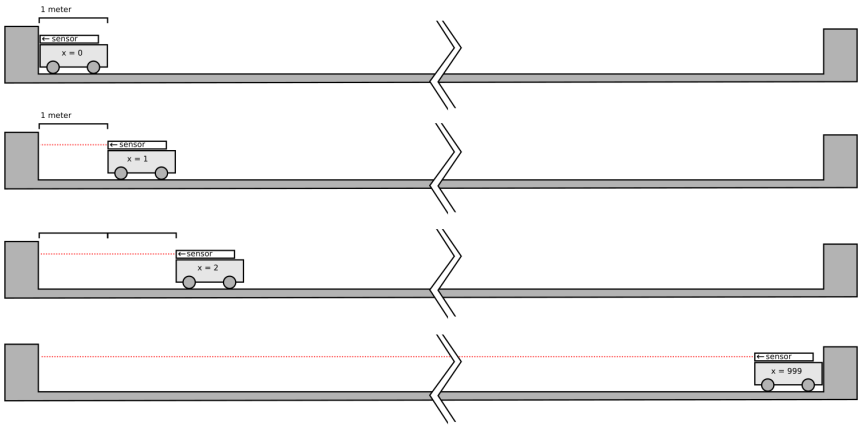

### 1.1

$p(i=N | x \in \{0, 1\}) = 0.6$

$p(i=M | x \in \{0, 1\}) = 0.2$

$p(i=F | x \in \{0, 1\}) = 0.2$

$p(i=N | x \in \{2, 3\}) = 0$

$p(i=M | x \in \{2, 3\}) = 0.6$

$p(i=F | x \in \{2, 3\}) = 0.4$

$p(i=N | x \geq 4) = 0$

$p(i=M | x \geq 4) = 0$

$p(i=F | x \geq 4) = 1$


### 1.2

In [2]:
import numpy as np

def sensormodel(i, x):
    if x in {0, 1}:
        return {"N": 0.6, "M": 0.2, "F": 0.2}[i]
    if x in {2, 3}:
        return {"N": 0.0, "M": 0.6, "F": 0.4}[i]
    else:
        return {"N": 0.0, "M": 0.0, "F": 1.0}[i]

def kidnap():
    return np.full((1000,), 1/1000)

def normalize(bs):
    return bs/sum(bs)
        
def sense(bs,i):
    bs = bs.copy()
    for x,b in enumerate(bs):
        bs[x] = b * sensormodel(i, x)
    bs = normalize(bs)
    return bs
        
def displayfirst(bs, n=5):
    print("\nBeliefs:")
    for x,b in enumerate(bs[:n]):
        print(f"x = {x:02d}; b = {b:0.3f}")
    print(f"x>= {n:02d}; b = {np.sum(bs[n:]):0.3f}")

In [ ]:
bs = kidnap()
bs = sense(bs, "N")
displayfirst(bs)
bs = sense(bs, "N")
displayfirst(bs)
bs = sense(bs, "F")
displayfirst(bs)

### 1.3

In [9]:
bs = kidnap()
bs = sense(bs, "M")
displayfirst(bs)


Beliefs:
x = 00; b = 0.125
x = 01; b = 0.125
x = 02; b = 0.375
x = 03; b = 0.375
x = 04; b = 0.000
x>= 05; b = 0.000


### 1.4
After sensing $i=F$, the belief will be
$$\frac{[0.2 \; 0.2 \; 0.4 \; 0.4 \; 1.0 \; 1.0 \; 1.0 \cdots]}{k}$$
where $k$ is a normalization factor, i.e. the sum of all elements in the vector.
$$k = 0.2+0.2+0.4+0.4+1\cdot996$$

The expected answer is the sum of the last 500 elements of that vector, i.e. $500/(0.2+0.2+0.4+0.4+1\cdot996)$.

In [10]:
print(f"we expect: {500/(0.2+0.2+0.4+0.4+996):0.5f}")

we expect: 0.50140


In [11]:
bs = kidnap()
bs = sense(bs, "F")
print(f"{np.sum(bs[500:]):0.5f}")

0.50140


### 1.5

In [12]:
def act(bs, o):
    if(o=="R"):
        nbs = np.concatenate((np.array([0.0]),bs[:-1]))
        nbs = normalize(nbs)
        return nbs
    else:
        assert False
    
bs = kidnap()
bs = sense(bs, "N")
bs = act(bs, "R")
bs = sense(bs, "M")
displayfirst(bs)
bs = act(bs, "R")
bs = sense(bs, "F")
displayfirst(bs)


Beliefs:
x = 00; b = 0.000
x = 01; b = 0.250
x = 02; b = 0.750
x = 03; b = 0.000
x = 04; b = 0.000
x>= 05; b = 0.000

Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.250
x = 03; b = 0.750
x = 04; b = 0.000
x>= 05; b = 0.000


## Exercise 2
### 2.1

In [13]:
def act(bs, o):
    if(o=="J"):
        nbs = np.convolve(bs,[0.5,0,0.5][::-1],"same") # note: convolve reverses the second array
        nbs = normalize(nbs)
        return nbs
    else:
        assert False
        
bs = np.zeros(20)
bs[5] = 1

displayfirst(bs, 10)
bs = act(bs, "J")
displayfirst(bs, 10)
bs = act(bs, "J")
displayfirst(bs, 10)


Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.000
x = 04; b = 0.000
x = 05; b = 1.000
x = 06; b = 0.000
x = 07; b = 0.000
x = 08; b = 0.000
x = 09; b = 0.000
x>= 10; b = 0.000

Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.000
x = 04; b = 0.500
x = 05; b = 0.000
x = 06; b = 0.500
x = 07; b = 0.000
x = 08; b = 0.000
x = 09; b = 0.000
x>= 10; b = 0.000

Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.250
x = 04; b = 0.000
x = 05; b = 0.500
x = 06; b = 0.000
x = 07; b = 0.250
x = 08; b = 0.000
x = 09; b = 0.000
x>= 10; b = 0.000


### 2.2

In [14]:
bs = np.zeros(20)
bs[5] = 0.5
bs[9] = 0.5

displayfirst(bs, 12)
bs = act(bs, "J")
displayfirst(bs, 12)
bs = act(bs, "J")
displayfirst(bs, 12)


Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.000
x = 04; b = 0.000
x = 05; b = 0.500
x = 06; b = 0.000
x = 07; b = 0.000
x = 08; b = 0.000
x = 09; b = 0.500
x = 10; b = 0.000
x = 11; b = 0.000
x>= 12; b = 0.000

Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.000
x = 04; b = 0.250
x = 05; b = 0.000
x = 06; b = 0.250
x = 07; b = 0.000
x = 08; b = 0.250
x = 09; b = 0.000
x = 10; b = 0.250
x = 11; b = 0.000
x>= 12; b = 0.000

Beliefs:
x = 00; b = 0.000
x = 01; b = 0.000
x = 02; b = 0.000
x = 03; b = 0.125
x = 04; b = 0.000
x = 05; b = 0.250
x = 06; b = 0.000
x = 07; b = 0.250
x = 08; b = 0.000
x = 09; b = 0.250
x = 10; b = 0.000
x = 11; b = 0.125
x>= 12; b = 0.000


## Question 4.1
The sensor is active because it uses a laser.

The sensor is exteroceptive because it measures the distance to an object that is outside of the robot (part of its environment).

## Question 4.2
The errors are non-systematic: they are not deterministic and can not be modeled in exact terms.  However, they can be described in probabilistic terms (which is what we did in exercise 1).

## Question 4.3
Yes, we can say that aliasing is the main problem affecting the sensor on the right half of the rail; in fact, whatever the location of the robot on the right half of the rail, the sensor will always return the same output.

Note that one could also characterize the issue as a limitation in the _resolution_ of the sensor.